# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:39:57.693084: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:40:00.690232
2025-04-14 20:40:00.690232


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:39:55"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

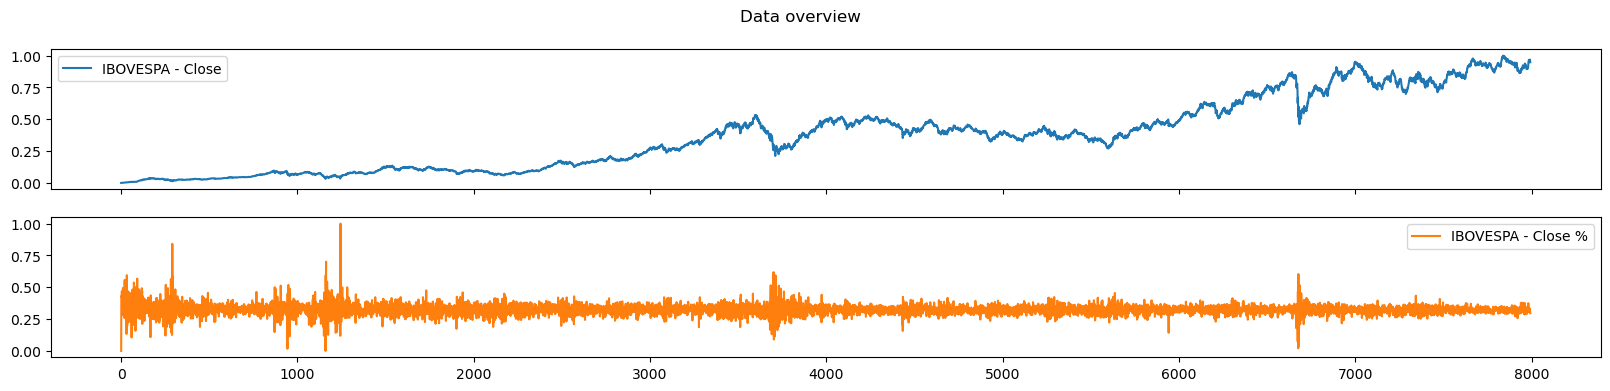

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

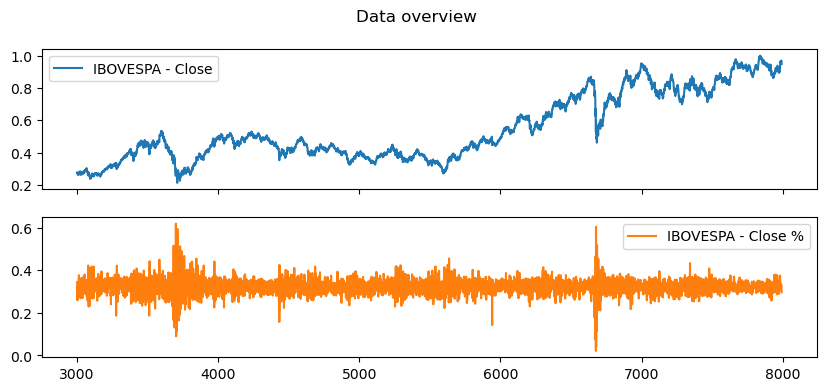

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

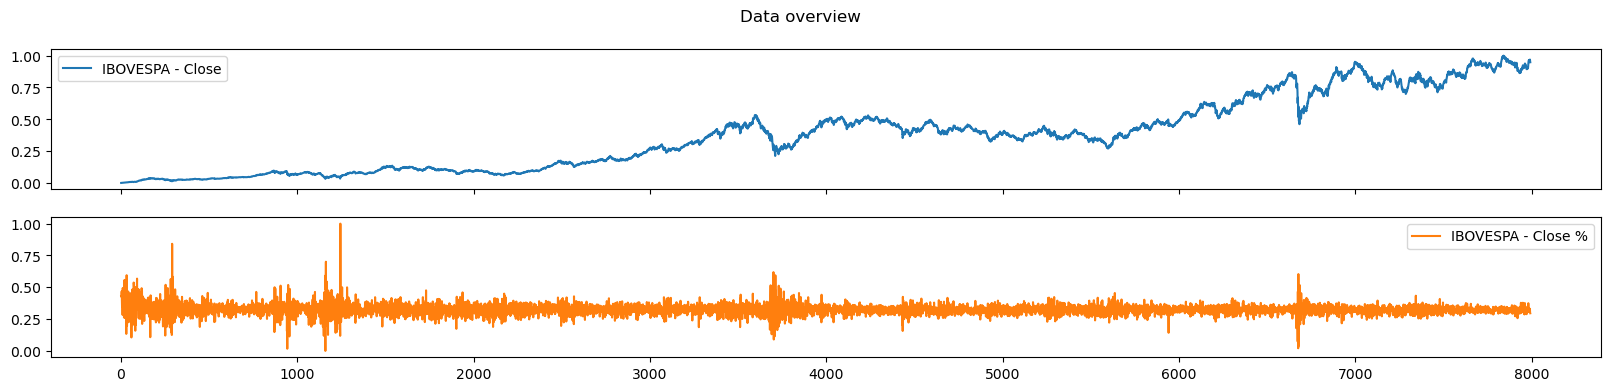

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

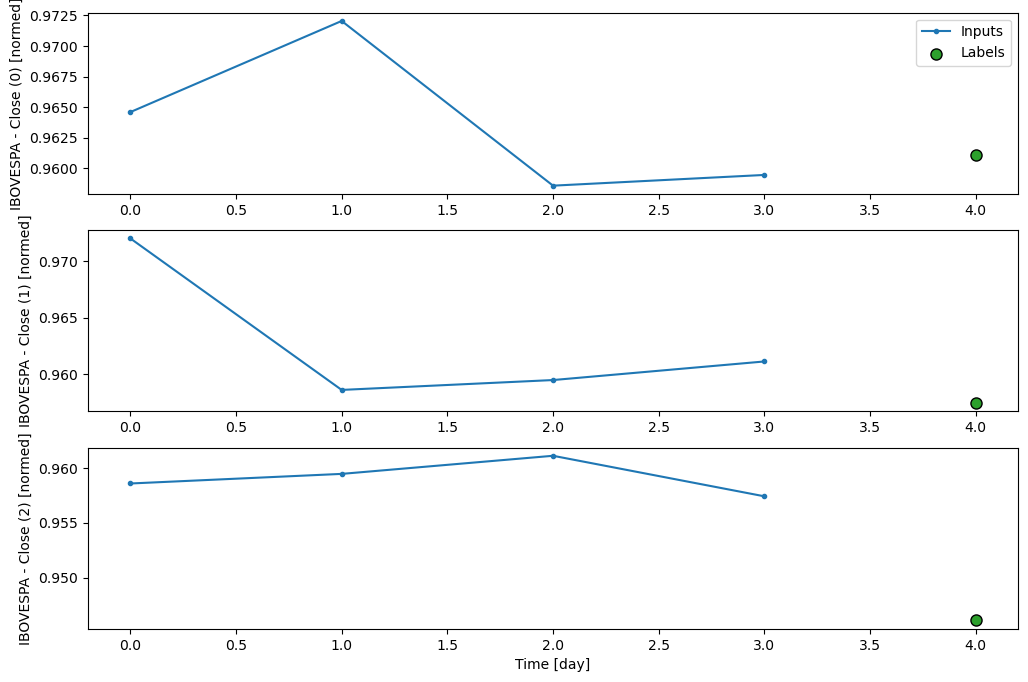

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12:28 3s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 120.7740 - mean_squared_error: 2.4040e-04 - root_mean_squared_error: 0.0146  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 99.4741 - mean_squared_error: 2.5789e-04 - root_mean_squared_error: 0.0156 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 86.1586 - mean_squared_error: 2.3747e-04 - root_mean_squared_error: 0.0150

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 76.2809 - mean_squared_error: 2.1946e-04 - root_mean_squared_error: 0.0145

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.2301 - mean_squared_error: 2.1316e-04 - root_mean_squared_error: 0.0143

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.6967 - mean_squared_error: 2.1108e-04 - root_mean_squared_error: 0.0143

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.5873 - mean_squared_error: 2.1237e-04 - root_mean_squared_error: 0.0144

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.3920 - mean_squared_error: 2.1642e-04 - root_mean_squared_error: 0.0145

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.1726 - mean_squared_error: 2.1954e-04 - root_mean_squared_error: 0.0146

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.4206 - mean_squared_error: 2.2151e-04 - root_mean_squared_error: 0.0147

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.7658 - mean_squared_error: 2.2314e-04 - root_mean_squared_error: 0.0148

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.2758 - mean_squared_error: 2.2983e-04 - root_mean_squared_error: 0.0150

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 45.1376 - mean_squared_error: 2.3918e-04 - root_mean_squared_error: 0.0153

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 43.2612 - mean_squared_error: 2.5314e-04 - root_mean_squared_error: 0.0157

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 41.4786 - mean_squared_error: 3.0315e-04 - root_mean_squared_error: 0.0168

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 40.0907 - mean_squared_error: 3.7175e-04 - root_mean_squared_error: 0.0182

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 38.9106 - mean_squared_error: 4.9645e-04 - root_mean_squared_error: 0.0201

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 38.3097 - mean_squared_error: 5.7182e-04 - root_mean_squared_error: 0.0212

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 37.7306 - mean_squared_error: 6.4052e-04 - root_mean_squared_error: 0.0223

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 37.2858 - mean_squared_error: 6.9238e-04 - root_mean_squared_error: 0.0230

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 36.7481 - mean_squared_error: 7.5243e-04 - root_mean_squared_error: 0.0239

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 36.4331 - mean_squared_error: 7.8542e-04 - root_mean_squared_error: 0.0244

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 36.2275 - mean_squared_error: 8.0654e-04 - root_mean_squared_error: 0.0248

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 35.8246 - mean_squared_error: 8.4629e-04 - root_mean_squared_error: 0.0254

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 35.2419 - mean_squared_error: 9.0087e-04 - root_mean_squared_error: 0.0262

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 34.8683 - mean_squared_error: 9.3451e-04 - root_mean_squared_error: 0.0267

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 34.6848 - mean_squared_error: 9.5032e-04 - root_mean_squared_error: 0.0270

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 34.2405 - mean_squared_error: 9.8810e-04 - root_mean_squared_error: 0.0276

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 33.9834 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0279    

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 33.8167 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 33.7351 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 33.5748 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 33.4963 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0286

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 33.3416 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 33.0416 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 32.8233 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 32.6103 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 32.4710 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 32.4018 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 32.3330 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 32.2644 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 32.1962 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 32.1283 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 32.0607 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 31.9934 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 31.9263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 31.7938 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 31.7294 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 31.6657 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 31.6025 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 31.4772 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 31.4152 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 31.2928 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 31.1139 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 30.9390 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 30.8812 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 30.7661 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 30.4843 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 30.0467 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355 - val_loss: 0.1545 - val_mean_absolute_error: 0.1545 - val_mean_absolute_percentage_error: 16.5817 - val_mean_squared_error: 0.0251 - val_root_mean_squared_error: 0.1584 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.6218 - mean_absolute_error: 0.6218 - mean_absolute_percentage_error: 26848.8105 - mean_squared_error: 0.3866 - root_mean_squared_error: 0.6218

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6024 - mean_absolute_error: 0.6024 - mean_absolute_percentage_error: 12607.7324 - mean_squared_error: 0.3637 - root_mean_squared_error: 0.6028 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5495 - mean_absolute_error: 0.5495 - mean_absolute_percentage_error: 8702.3535 - mean_squared_error: 0.3140 - root_mean_squared_error: 0.5580 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5114 - mean_absolute_error: 0.5114 - mean_absolute_percentage_error: 7417.8389 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5284

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4978 - mean_absolute_error: 0.4978 - mean_absolute_percentage_error: 7019.8442 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.5175

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - mean_absolute_percentage_error: 6668.0039 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.5071

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4372 - mean_absolute_error: 0.4372 - mean_absolute_percentage_error: 5586.1157 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4703

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 4683.5342 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4335

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 4110.2061 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.4069 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 3632.0830 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3825

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 3296.4417 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3640

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 3051.2107 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3497

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 2819.6992 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3356

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 2624.1599 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3231

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 2456.5498 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3120

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 2296.0991 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.3010

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 2170.4797 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2923

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 2059.2312 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2845

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 1959.9243 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2773

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 1870.6770 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2707

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 1789.9722 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2645

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 1732.3276 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2600

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 1656.7467 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2540

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 1594.6970 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2490

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 1537.5892 - mean_squared_error: 0.0734 - root_mean_squared_error: 0.2443

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 1484.8186 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2399

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 1435.8950 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2358

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1558 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 1390.4065 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2320

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 1347.9845 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2283

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 1316.9177 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2256 - val_loss: 0.0776 - val_mean_absolute_error: 0.0776 - val_mean_absolute_percentage_error: 8.2714 - val_mean_squared_error: 0.0069 - val_root_mean_squared_error: 0.0833 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5274 - mean_absolute_error: 0.5274 - mean_absolute_percentage_error: 22755.8633 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5274

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5155 - mean_absolute_error: 0.5155 - mean_absolute_percentage_error: 9593.5430 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.5157  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4914 - mean_absolute_error: 0.4914 - mean_absolute_percentage_error: 7045.5762 - mean_squared_error: 0.2443 - root_mean_squared_error: 0.4934

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4556 - mean_absolute_error: 0.4556 - mean_absolute_percentage_error: 5828.8628 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4664

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - mean_absolute_percentage_error: 5002.6724 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4399

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 4401.2910 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.4166

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 3829.7998 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3910

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 3402.4644 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3696

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 3069.4858 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3514

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 2801.9451 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3357

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 2581.7705 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3220

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 2396.9587 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3099

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 2223.2451 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2981

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 2089.1570 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2885

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 1996.6683 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2817

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 1901.5367 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2746

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 1805.8800 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2673

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 1720.3330 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2606

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1651.4844 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2551

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 1580.9677 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2493

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 1510.0294 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2433

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 1451.9421 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2383

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 1392.9310 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2331

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 1365.3656 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2307

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 1333.8374 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2278

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 1308.7662 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2256

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 1275.3698 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2225

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 1252.6472 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2204

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 1239.4391 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2192

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 1218.0955 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2173

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 1189.5397 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2146

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 1170.0380 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2128 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291 - val_mean_absolute_percentage_error: 3.0961 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0333 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 12797.0703 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2969

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 6911.7173 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2879  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 5315.7051 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2746

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 4220.8384 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2543

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 3433.8057 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2335

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 2992.0891 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2192

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 2662.0901 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2073

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 2359.8835 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1954

 44/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 2091.7822 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1838

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 1883.8678 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1741

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 1739.0575 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1670

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 1617.0535 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1607

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 1496.7418 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1542

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 1408.3785 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1492

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1318.8676 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1441

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 1241.1230 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1394 

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1172.8923 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1352

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 1120.6843 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1319

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 1073.3743 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1288

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 1030.2816 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1260

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 984.6074 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1229 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 943.2045 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1200

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 905.4758 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1174

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 870.9347 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1150

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 857.0051 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1140

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 843.5590 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1130

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 834.8505 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1124

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 826.3383 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1118

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 818.0156 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1111

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 809.8757 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1105

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 797.9951 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1097

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 779.0245 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1082

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 764.5479 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1071

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 743.9096 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1055

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 727.6249 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1043

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 709.0891 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1028

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 694.4174 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1017

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 680.3983 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1005

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 664.3759 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0993

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 651.6439 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0982

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 637.0565 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0970

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 630.0287 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0965

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 625.4374 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0961

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 623.1693 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0959

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 618.6867 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0955

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 614.2745 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0952

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 609.9310 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0948

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 601.4437 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0941

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 593.2120 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0934

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 589.1885 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0931

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 581.3231 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0924 - val_loss: 0.0591 - val_mean_absolute_error: 0.0591 - val_mean_absolute_percentage_error: 6.3230 - val_mean_squared_error: 0.0038 - val_root_mean_squared_error: 0.0615 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 4792.2539 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1111

  5/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 2761.9297 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1017 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 1795.3462 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0856

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 1375.4792 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0756

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 1130.6881 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0686

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 945.2115 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0625  

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 817.1154 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0579

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 734.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 668.8219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0521

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 606.9291 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 556.5760 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 514.7227 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 479.3193 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 448.9334 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 422.5391 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 399.3717 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 378.8536 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 360.5406 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 344.0883 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 329.2230 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 315.7146 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 303.3770 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 293.6192 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 283.0763 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 273.3364 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 261.8474 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 250.2664 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 240.7655 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 231.0963 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 223.0959 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 215.6861 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 208.8030 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 201.7031 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 199.0114 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2515 - val_mean_squared_error: 2.0922e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 2470.9902 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0573

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 889.0642 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 608.7079 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 474.5281 - mean_squared_error: 9.6910e-04 - root_mean_squared_error: 0.0294

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 393.5561 - mean_squared_error: 8.2198e-04 - root_mean_squared_error: 0.0268

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 354.9284 - mean_squared_error: 7.5016e-04 - root_mean_squared_error: 0.0255

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 310.6895 - mean_squared_error: 6.6633e-04 - root_mean_squared_error: 0.0239

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 277.2441 - mean_squared_error: 6.0161e-04 - root_mean_squared_error: 0.0226

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 250.9698 - mean_squared_error: 5.4979e-04 - root_mean_squared_error: 0.0215

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 229.7157 - mean_squared_error: 5.0722e-04 - root_mean_squared_error: 0.0205

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 210.3527 - mean_squared_error: 4.6811e-04 - root_mean_squared_error: 0.0196

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 195.7827 - mean_squared_error: 4.3849e-04 - root_mean_squared_error: 0.0189

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 183.2923 - mean_squared_error: 4.1311e-04 - root_mean_squared_error: 0.0183

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 172.4570 - mean_squared_error: 3.9188e-04 - root_mean_squared_error: 0.0178

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 162.9737 - mean_squared_error: 3.7557e-04 - root_mean_squared_error: 0.0175

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 154.5961 - mean_squared_error: 3.6377e-04 - root_mean_squared_error: 0.0172

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 147.1290 - mean_squared_error: 3.5399e-04 - root_mean_squared_error: 0.0171

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 140.4234 - mean_squared_error: 3.4512e-04 - root_mean_squared_error: 0.0169

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 134.3625 - mean_squared_error: 3.3676e-04 - root_mean_squared_error: 0.0167

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 128.8543 - mean_squared_error: 3.2883e-04 - root_mean_squared_error: 0.0166

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 123.2932 - mean_squared_error: 3.2057e-04 - root_mean_squared_error: 0.0164

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 118.7242 - mean_squared_error: 3.1362e-04 - root_mean_squared_error: 0.0162

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 114.0676 - mean_squared_error: 3.0638e-04 - root_mean_squared_error: 0.0161

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 109.7981 - mean_squared_error: 2.9979e-04 - root_mean_squared_error: 0.0159

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 106.2486 - mean_squared_error: 2.9489e-04 - root_mean_squared_error: 0.0158

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 102.9445 - mean_squared_error: 2.9048e-04 - root_mean_squared_error: 0.0157

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 99.5308 - mean_squared_error: 2.8607e-04 - root_mean_squared_error: 0.0156 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 99.2037 - mean_squared_error: 2.8565e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2749 - val_mean_squared_error: 2.0968e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 3208.5806 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0744

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 1186.9592 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 797.0988 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 628.7600 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 524.4935 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 459.6595 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 405.2208 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 363.4440 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 326.9737 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 300.4519 - mean_squared_error: 9.5288e-04 - root_mean_squared_error: 0.0281

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 278.3016 - mean_squared_error: 8.8665e-04 - root_mean_squared_error: 0.0270

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 259.4906 - mean_squared_error: 8.3009e-04 - root_mean_squared_error: 0.0260

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 243.2955 - mean_squared_error: 7.8130e-04 - root_mean_squared_error: 0.0251

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 229.1933 - mean_squared_error: 7.3909e-04 - root_mean_squared_error: 0.0243

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 218.0965 - mean_squared_error: 7.0611e-04 - root_mean_squared_error: 0.0237

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 206.9513 - mean_squared_error: 6.7306e-04 - root_mean_squared_error: 0.0231

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 196.9968 - mean_squared_error: 6.4358e-04 - root_mean_squared_error: 0.0225

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 188.0483 - mean_squared_error: 6.1725e-04 - root_mean_squared_error: 0.0220

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 182.5655 - mean_squared_error: 6.0112e-04 - root_mean_squared_error: 0.0217

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 174.9746 - mean_squared_error: 5.7888e-04 - root_mean_squared_error: 0.0213

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 168.0514 - mean_squared_error: 5.5869e-04 - root_mean_squared_error: 0.0209

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 161.7087 - mean_squared_error: 5.4027e-04 - root_mean_squared_error: 0.0205

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 155.8746 - mean_squared_error: 5.2361e-04 - root_mean_squared_error: 0.0202

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 150.4893 - mean_squared_error: 5.0887e-04 - root_mean_squared_error: 0.0199

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 146.0372 - mean_squared_error: 4.9727e-04 - root_mean_squared_error: 0.0197

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 141.3643 - mean_squared_error: 4.8547e-04 - root_mean_squared_error: 0.0194

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 137.0099 - mean_squared_error: 4.7463e-04 - root_mean_squared_error: 0.0193

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 133.8234 - mean_squared_error: 4.6676e-04 - root_mean_squared_error: 0.0191 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0102 - val_mean_squared_error: 1.3860e-04 - val_root_mean_squared_error: 0.0118 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 4483.9243 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1039

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 1786.7827 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0838 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 1170.3406 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0692

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 914.5561 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0612 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 772.7670 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 662.4342 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 574.7936 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 515.3488 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 463.5231 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 425.8690 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 394.4438 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 367.7673 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 344.8008 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 324.7999 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 309.0615 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 293.2546 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 279.1361 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 266.4424 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 254.9590 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 243.4147 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 233.9671 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 224.3737 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 216.4505 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0286

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 209.1211 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 202.3213 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0277

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 195.3186 - mean_squared_error: 9.8473e-04 - root_mean_squared_error: 0.0274

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 189.4596 - mean_squared_error: 9.6208e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7863 - val_mean_squared_error: 8.2852e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 2999.5571 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0695

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 1252.5675 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0551 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 863.8218 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 659.9458 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 552.0706 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 470.0807 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 405.9348 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 362.8267 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 325.4748 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 298.4749 - mean_squared_error: 9.6573e-04 - root_mean_squared_error: 0.0288

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 276.0355 - mean_squared_error: 8.9892e-04 - root_mean_squared_error: 0.0276

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 257.0597 - mean_squared_error: 8.4210e-04 - root_mean_squared_error: 0.0266

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 240.7810 - mean_squared_error: 7.9352e-04 - root_mean_squared_error: 0.0257

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 226.6452 - mean_squared_error: 7.5207e-04 - root_mean_squared_error: 0.0250

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 215.5594 - mean_squared_error: 7.2157e-04 - root_mean_squared_error: 0.0245

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 204.4567 - mean_squared_error: 6.9305e-04 - root_mean_squared_error: 0.0240

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 194.5579 - mean_squared_error: 6.6787e-04 - root_mean_squared_error: 0.0235

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 185.6687 - mean_squared_error: 6.4501e-04 - root_mean_squared_error: 0.0231

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 176.7899 - mean_squared_error: 6.2171e-04 - root_mean_squared_error: 0.0227

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 169.5652 - mean_squared_error: 6.0238e-04 - root_mean_squared_error: 0.0224

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 162.2672 - mean_squared_error: 5.8252e-04 - root_mean_squared_error: 0.0220

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 155.6317 - mean_squared_error: 5.6421e-04 - root_mean_squared_error: 0.0216

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 150.1518 - mean_squared_error: 5.4891e-04 - root_mean_squared_error: 0.0213

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 145.0818 - mean_squared_error: 5.3468e-04 - root_mean_squared_error: 0.0211

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 140.3768 - mean_squared_error: 5.2172e-04 - root_mean_squared_error: 0.0208

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 135.5288 - mean_squared_error: 5.0835e-04 - root_mean_squared_error: 0.0205

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 131.0369 - mean_squared_error: 4.9597e-04 - root_mean_squared_error: 0.0203

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 130.6064 - mean_squared_error: 4.9478e-04 - root_mean_squared_error: 0.0203 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7565 - val_mean_squared_error: 7.7475e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 2321.2886 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 901.2906 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 586.8372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 456.9577 - mean_squared_error: 9.3100e-04 - root_mean_squared_error: 0.0289

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 385.3890 - mean_squared_error: 7.9528e-04 - root_mean_squared_error: 0.0264

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 329.9859 - mean_squared_error: 6.8867e-04 - root_mean_squared_error: 0.0243

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 286.1462 - mean_squared_error: 6.0380e-04 - root_mean_squared_error: 0.0226

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 259.4308 - mean_squared_error: 5.5147e-04 - root_mean_squared_error: 0.0215

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 233.0159 - mean_squared_error: 4.9946e-04 - root_mean_squared_error: 0.0203

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 213.9137 - mean_squared_error: 4.6162e-04 - root_mean_squared_error: 0.0194

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 196.3987 - mean_squared_error: 4.2673e-04 - root_mean_squared_error: 0.0186

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 183.1550 - mean_squared_error: 4.0043e-04 - root_mean_squared_error: 0.0180

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 171.7573 - mean_squared_error: 3.7802e-04 - root_mean_squared_error: 0.0174

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 161.8345 - mean_squared_error: 3.5899e-04 - root_mean_squared_error: 0.0169

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 155.9014 - mean_squared_error: 3.4796e-04 - root_mean_squared_error: 0.0167

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 148.7055 - mean_squared_error: 3.3489e-04 - root_mean_squared_error: 0.0164

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 140.6849 - mean_squared_error: 3.2049e-04 - root_mean_squared_error: 0.0160

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 133.5692 - mean_squared_error: 3.0779e-04 - root_mean_squared_error: 0.0157

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 127.8126 - mean_squared_error: 2.9739e-04 - root_mean_squared_error: 0.0154

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 122.5803 - mean_squared_error: 2.8789e-04 - root_mean_squared_error: 0.0152

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 117.8017 - mean_squared_error: 2.7915e-04 - root_mean_squared_error: 0.0150

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 113.4181 - mean_squared_error: 2.7111e-04 - root_mean_squared_error: 0.0147

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 109.3804 - mean_squared_error: 2.6367e-04 - root_mean_squared_error: 0.0145

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 105.6479 - mean_squared_error: 2.5682e-04 - root_mean_squared_error: 0.0144

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 102.1876 - mean_squared_error: 2.5092e-04 - root_mean_squared_error: 0.0142

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 98.6250 - mean_squared_error: 2.4500e-04 - root_mean_squared_error: 0.0141 

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 95.6456 - mean_squared_error: 2.4016e-04 - root_mean_squared_error: 0.0139

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 94.6968 - mean_squared_error: 2.3863e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9076 - val_mean_squared_error: 1.0996e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 2321.7969 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 850.9058 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 567.0709 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 445.6046 - mean_squared_error: 9.0309e-04 - root_mean_squared_error: 0.0284

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 370.6980 - mean_squared_error: 7.6126e-04 - root_mean_squared_error: 0.0258

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 319.3595 - mean_squared_error: 6.6188e-04 - root_mean_squared_error: 0.0238

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 281.7246 - mean_squared_error: 5.8841e-04 - root_mean_squared_error: 0.0222

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 249.9834 - mean_squared_error: 5.2569e-04 - root_mean_squared_error: 0.0209

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 227.5154 - mean_squared_error: 4.8082e-04 - root_mean_squared_error: 0.0198

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 209.1176 - mean_squared_error: 4.4384e-04 - root_mean_squared_error: 0.0189

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 193.7486 - mean_squared_error: 4.1291e-04 - root_mean_squared_error: 0.0182

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 180.6990 - mean_squared_error: 3.8687e-04 - root_mean_squared_error: 0.0175

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 169.4635 - mean_squared_error: 3.6480e-04 - root_mean_squared_error: 0.0170

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 160.7049 - mean_squared_error: 3.4822e-04 - root_mean_squared_error: 0.0166

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 151.9890 - mean_squared_error: 3.3293e-04 - root_mean_squared_error: 0.0162

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 144.2652 - mean_squared_error: 3.2011e-04 - root_mean_squared_error: 0.0159

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 137.3645 - mean_squared_error: 3.0869e-04 - root_mean_squared_error: 0.0156

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 130.5049 - mean_squared_error: 2.9719e-04 - root_mean_squared_error: 0.0154

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 124.9470 - mean_squared_error: 2.8772e-04 - root_mean_squared_error: 0.0151

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 119.3550 - mean_squared_error: 2.7811e-04 - root_mean_squared_error: 0.0149

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 114.2901 - mean_squared_error: 2.6934e-04 - root_mean_squared_error: 0.0147

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 110.1210 - mean_squared_error: 2.6210e-04 - root_mean_squared_error: 0.0145

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 106.2745 - mean_squared_error: 2.5543e-04 - root_mean_squared_error: 0.0143

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 103.0963 - mean_squared_error: 2.5012e-04 - root_mean_squared_error: 0.0142

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 99.7635 - mean_squared_error: 2.4492e-04 - root_mean_squared_error: 0.0140 

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 96.3288 - mean_squared_error: 2.3971e-04 - root_mean_squared_error: 0.0139

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 93.7640 - mean_squared_error: 2.3591e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7439 - val_mean_squared_error: 7.4870e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 2875.6340 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0666

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 1128.6952 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 741.7356 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 580.4383 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 481.7623 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 408.2492 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 360.5746 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 320.2621 - mean_squared_error: 9.1030e-04 - root_mean_squared_error: 0.0277

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 291.6680 - mean_squared_error: 8.3368e-04 - root_mean_squared_error: 0.0264

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 268.2212 - mean_squared_error: 7.7028e-04 - root_mean_squared_error: 0.0252

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 248.6067 - mean_squared_error: 7.1690e-04 - root_mean_squared_error: 0.0242

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 231.9283 - mean_squared_error: 6.7134e-04 - root_mean_squared_error: 0.0233

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 217.5529 - mean_squared_error: 6.3209e-04 - root_mean_squared_error: 0.0225

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 206.3366 - mean_squared_error: 6.0179e-04 - root_mean_squared_error: 0.0219

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 197.5270 - mean_squared_error: 5.7837e-04 - root_mean_squared_error: 0.0214

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 189.5141 - mean_squared_error: 5.5734e-04 - root_mean_squared_error: 0.0210

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 181.1953 - mean_squared_error: 5.3567e-04 - root_mean_squared_error: 0.0206

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 172.7539 - mean_squared_error: 5.1395e-04 - root_mean_squared_error: 0.0201

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 165.1377 - mean_squared_error: 4.9425e-04 - root_mean_squared_error: 0.0197

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 157.5001 - mean_squared_error: 4.7442e-04 - root_mean_squared_error: 0.0193

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 151.2636 - mean_squared_error: 4.5819e-04 - root_mean_squared_error: 0.0189

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 144.9442 - mean_squared_error: 4.4175e-04 - root_mean_squared_error: 0.0186

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 139.7348 - mean_squared_error: 4.2825e-04 - root_mean_squared_error: 0.0183

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 134.9232 - mean_squared_error: 4.1600e-04 - root_mean_squared_error: 0.0180

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 131.4278 - mean_squared_error: 4.0769e-04 - root_mean_squared_error: 0.0178

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 129.0520 - mean_squared_error: 4.0245e-04 - root_mean_squared_error: 0.0177

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 125.0073 - mean_squared_error: 3.9400e-04 - root_mean_squared_error: 0.0176

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 122.0499 - mean_squared_error: 3.8796e-04 - root_mean_squared_error: 0.0175

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 120.4291 - mean_squared_error: 3.8466e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7335 - val_mean_squared_error: 6.9282e-05 - val_root_mean_squared_error: 0.0083 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 3102.0071 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0718

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 1228.9662 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 841.1091 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 641.7715 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 535.2316 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 462.0150 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 408.1623 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 366.6672 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 340.3605 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 315.0092 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 291.0768 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 272.9571 - mean_squared_error: 9.7246e-04 - root_mean_squared_error: 0.0287

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 255.3504 - mean_squared_error: 9.1472e-04 - root_mean_squared_error: 0.0277

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 238.5223 - mean_squared_error: 8.5948e-04 - root_mean_squared_error: 0.0268

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 225.3577 - mean_squared_error: 8.1694e-04 - root_mean_squared_error: 0.0260

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 212.5029 - mean_squared_error: 7.7584e-04 - root_mean_squared_error: 0.0253

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 202.2472 - mean_squared_error: 7.4303e-04 - root_mean_squared_error: 0.0247

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 192.0643 - mean_squared_error: 7.1030e-04 - root_mean_squared_error: 0.0241

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 183.8212 - mean_squared_error: 6.8357e-04 - root_mean_squared_error: 0.0236

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 176.3245 - mean_squared_error: 6.5913e-04 - root_mean_squared_error: 0.0231

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 169.4742 - mean_squared_error: 6.3667e-04 - root_mean_squared_error: 0.0227

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 163.1872 - mean_squared_error: 6.1597e-04 - root_mean_squared_error: 0.0223

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 157.3943 - mean_squared_error: 5.9683e-04 - root_mean_squared_error: 0.0219

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 152.6129 - mean_squared_error: 5.8103e-04 - root_mean_squared_error: 0.0216

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 149.7844 - mean_squared_error: 5.7187e-04 - root_mean_squared_error: 0.0214

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 146.5397 - mean_squared_error: 5.6150e-04 - root_mean_squared_error: 0.0212

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 143.4466 - mean_squared_error: 5.5167e-04 - root_mean_squared_error: 0.0210

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 139.0679 - mean_squared_error: 5.3782e-04 - root_mean_squared_error: 0.0207

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 136.3100 - mean_squared_error: 5.2914e-04 - root_mean_squared_error: 0.0206 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7435 - val_mean_squared_error: 7.5062e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 1984.4009 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 767.5038 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 506.1234 - mean_squared_error: 8.9608e-04 - root_mean_squared_error: 0.0291

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 407.5054 - mean_squared_error: 7.5677e-04 - root_mean_squared_error: 0.0266

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 337.9024 - mean_squared_error: 6.4903e-04 - root_mean_squared_error: 0.0244

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 290.7643 - mean_squared_error: 5.7171e-04 - root_mean_squared_error: 0.0227

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 253.1314 - mean_squared_error: 5.0784e-04 - root_mean_squared_error: 0.0213

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 225.0164 - mean_squared_error: 4.5854e-04 - root_mean_squared_error: 0.0201

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 205.1340 - mean_squared_error: 4.2300e-04 - root_mean_squared_error: 0.0192

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 190.5076 - mean_squared_error: 3.9644e-04 - root_mean_squared_error: 0.0185

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 176.6063 - mean_squared_error: 3.7082e-04 - root_mean_squared_error: 0.0179

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 164.7949 - mean_squared_error: 3.4882e-04 - root_mean_squared_error: 0.0173

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 154.6206 - mean_squared_error: 3.2986e-04 - root_mean_squared_error: 0.0167

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 144.8418 - mean_squared_error: 3.1198e-04 - root_mean_squared_error: 0.0162

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 137.1489 - mean_squared_error: 2.9808e-04 - root_mean_squared_error: 0.0158

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 130.3124 - mean_squared_error: 2.8567e-04 - root_mean_squared_error: 0.0155

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 124.1929 - mean_squared_error: 2.7455e-04 - root_mean_squared_error: 0.0152

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 118.1009 - mean_squared_error: 2.6345e-04 - root_mean_squared_error: 0.0148

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 113.1586 - mean_squared_error: 2.5439e-04 - root_mean_squared_error: 0.0146

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 110.1116 - mean_squared_error: 2.4880e-04 - root_mean_squared_error: 0.0144

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 106.3219 - mean_squared_error: 2.4184e-04 - root_mean_squared_error: 0.0142

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 101.9739 - mean_squared_error: 2.3388e-04 - root_mean_squared_error: 0.0139

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 98.7696 - mean_squared_error: 2.2805e-04 - root_mean_squared_error: 0.0138 

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 95.4217 - mean_squared_error: 2.2204e-04 - root_mean_squared_error: 0.0136

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 92.6515 - mean_squared_error: 2.1760e-04 - root_mean_squared_error: 0.0134

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 89.7421 - mean_squared_error: 2.1343e-04 - root_mean_squared_error: 0.0133

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 87.0291 - mean_squared_error: 2.0977e-04 - root_mean_squared_error: 0.0132

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 85.3201 - mean_squared_error: 2.0750e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0200 - val_mean_squared_error: 1.3990e-04 - val_root_mean_squared_error: 0.0118 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 2700.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0626

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 1063.5466 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 717.8223 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 556.2320 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 459.7279 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 388.6277 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 342.7423 - mean_squared_error: 9.0840e-04 - root_mean_squared_error: 0.0280

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 304.1152 - mean_squared_error: 8.1407e-04 - root_mean_squared_error: 0.0263

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 279.5988 - mean_squared_error: 7.5346e-04 - root_mean_squared_error: 0.0252

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 256.8039 - mean_squared_error: 6.9651e-04 - root_mean_squared_error: 0.0241

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 237.8002 - mean_squared_error: 6.4868e-04 - root_mean_squared_error: 0.0231

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 220.0408 - mean_squared_error: 6.0378e-04 - root_mean_squared_error: 0.0222

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 206.3972 - mean_squared_error: 5.6931e-04 - root_mean_squared_error: 0.0215

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 194.5112 - mean_squared_error: 5.3967e-04 - root_mean_squared_error: 0.0209

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 184.0575 - mean_squared_error: 5.1410e-04 - root_mean_squared_error: 0.0203

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 174.7792 - mean_squared_error: 4.9156e-04 - root_mean_squared_error: 0.0199

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 166.4829 - mean_squared_error: 4.7151e-04 - root_mean_squared_error: 0.0194

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 158.2305 - mean_squared_error: 4.5153e-04 - root_mean_squared_error: 0.0190

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 152.2516 - mean_squared_error: 4.3694e-04 - root_mean_squared_error: 0.0187

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 146.0968 - mean_squared_error: 4.2191e-04 - root_mean_squared_error: 0.0183

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 139.8727 - mean_squared_error: 4.0665e-04 - root_mean_squared_error: 0.0180

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 134.7516 - mean_squared_error: 3.9408e-04 - root_mean_squared_error: 0.0177

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 129.5265 - mean_squared_error: 3.8136e-04 - root_mean_squared_error: 0.0174

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 125.1934 - mean_squared_error: 3.7131e-04 - root_mean_squared_error: 0.0172

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 120.7431 - mean_squared_error: 3.6237e-04 - root_mean_squared_error: 0.0170

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 117.0298 - mean_squared_error: 3.5643e-04 - root_mean_squared_error: 0.0169

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 113.9366 - mean_squared_error: 3.5179e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0136 - val_mean_squared_error: 1.3446e-04 - val_root_mean_squared_error: 0.0116 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 1900.1021 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0441

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 738.1570 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 496.9988 - mean_squared_error: 8.0841e-04 - root_mean_squared_error: 0.0274

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 403.2534 - mean_squared_error: 6.6953e-04 - root_mean_squared_error: 0.0246

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 328.1370 - mean_squared_error: 5.5367e-04 - root_mean_squared_error: 0.0221

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 278.7691 - mean_squared_error: 4.7545e-04 - root_mean_squared_error: 0.0202

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 243.5222 - mean_squared_error: 4.1865e-04 - root_mean_squared_error: 0.0188

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 214.3902 - mean_squared_error: 3.7118e-04 - root_mean_squared_error: 0.0176

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 194.0757 - mean_squared_error: 3.3772e-04 - root_mean_squared_error: 0.0166

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 177.6290 - mean_squared_error: 3.1044e-04 - root_mean_squared_error: 0.0159

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 164.0058 - mean_squared_error: 2.8776e-04 - root_mean_squared_error: 0.0152

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 152.5170 - mean_squared_error: 2.6868e-04 - root_mean_squared_error: 0.0146

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 142.6845 - mean_squared_error: 2.5254e-04 - root_mean_squared_error: 0.0141

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 133.2878 - mean_squared_error: 2.3774e-04 - root_mean_squared_error: 0.0137

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 125.9385 - mean_squared_error: 2.2696e-04 - root_mean_squared_error: 0.0134

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 118.7613 - mean_squared_error: 2.1689e-04 - root_mean_squared_error: 0.0131

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 113.0349 - mean_squared_error: 2.0896e-04 - root_mean_squared_error: 0.0128

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 107.8887 - mean_squared_error: 2.0182e-04 - root_mean_squared_error: 0.0126

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 103.7305 - mean_squared_error: 1.9600e-04 - root_mean_squared_error: 0.0125

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 99.4569 - mean_squared_error: 1.8998e-04 - root_mean_squared_error: 0.0123 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 95.5559 - mean_squared_error: 1.8445e-04 - root_mean_squared_error: 0.0121

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 91.5997 - mean_squared_error: 1.7881e-04 - root_mean_squared_error: 0.0119

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 88.3358 - mean_squared_error: 1.7417e-04 - root_mean_squared_error: 0.0118

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 84.9979 - mean_squared_error: 1.6958e-04 - root_mean_squared_error: 0.0116

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 82.2245 - mean_squared_error: 1.6623e-04 - root_mean_squared_error: 0.0116

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 79.6442 - mean_squared_error: 1.6328e-04 - root_mean_squared_error: 0.0115

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 76.9796 - mean_squared_error: 1.6038e-04 - root_mean_squared_error: 0.0114

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 76.7244 - mean_squared_error: 1.6010e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8213 - val_mean_squared_error: 9.2309e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 1772.5500 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 688.9702 - mean_squared_error: 9.8763e-04 - root_mean_squared_error: 0.0309

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 469.0782 - mean_squared_error: 7.4472e-04 - root_mean_squared_error: 0.0266

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 357.2356 - mean_squared_error: 6.0227e-04 - root_mean_squared_error: 0.0237

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 297.4442 - mean_squared_error: 5.1681e-04 - root_mean_squared_error: 0.0217

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 252.8096 - mean_squared_error: 4.4954e-04 - root_mean_squared_error: 0.0201

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 223.7859 - mean_squared_error: 4.0455e-04 - root_mean_squared_error: 0.0190

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 199.2064 - mean_squared_error: 3.6549e-04 - root_mean_squared_error: 0.0179

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 183.5418 - mean_squared_error: 3.4019e-04 - root_mean_squared_error: 0.0172

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 168.9278 - mean_squared_error: 3.1623e-04 - root_mean_squared_error: 0.0165

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 156.6955 - mean_squared_error: 2.9588e-04 - root_mean_squared_error: 0.0159

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 145.2261 - mean_squared_error: 2.7661e-04 - root_mean_squared_error: 0.0153

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 136.3912 - mean_squared_error: 2.6183e-04 - root_mean_squared_error: 0.0149

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 128.6801 - mean_squared_error: 2.4930e-04 - root_mean_squared_error: 0.0145

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 121.8826 - mean_squared_error: 2.3837e-04 - root_mean_squared_error: 0.0141

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 116.4764 - mean_squared_error: 2.2965e-04 - root_mean_squared_error: 0.0139

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 112.7592 - mean_squared_error: 2.2365e-04 - root_mean_squared_error: 0.0137

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 107.6530 - mean_squared_error: 2.1541e-04 - root_mean_squared_error: 0.0134

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 103.5270 - mean_squared_error: 2.0873e-04 - root_mean_squared_error: 0.0132

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.8385 - mean_squared_error: 2.0112e-04 - root_mean_squared_error: 0.0129 

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 95.0048 - mean_squared_error: 1.9488e-04 - root_mean_squared_error: 0.0127

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 91.4880 - mean_squared_error: 1.8919e-04 - root_mean_squared_error: 0.0125

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 88.2487 - mean_squared_error: 1.8398e-04 - root_mean_squared_error: 0.0124

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 85.2543 - mean_squared_error: 1.7926e-04 - root_mean_squared_error: 0.0122

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 82.1827 - mean_squared_error: 1.7516e-04 - root_mean_squared_error: 0.0121

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 79.6218 - mean_squared_error: 1.7211e-04 - root_mean_squared_error: 0.0120

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 76.9770 - mean_squared_error: 1.6916e-04 - root_mean_squared_error: 0.0119

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 76.2217 - mean_squared_error: 1.6833e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9267 - val_mean_squared_error: 1.1575e-04 - val_root_mean_squared_error: 0.0108 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 1952.5073 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 760.2474 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 511.5406 - mean_squared_error: 8.5959e-04 - root_mean_squared_error: 0.0282

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 386.6653 - mean_squared_error: 6.7155e-04 - root_mean_squared_error: 0.0246

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 320.7428 - mean_squared_error: 5.6694e-04 - root_mean_squared_error: 0.0223

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 275.8957 - mean_squared_error: 4.9373e-04 - root_mean_squared_error: 0.0207

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 243.1557 - mean_squared_error: 4.3959e-04 - root_mean_squared_error: 0.0194

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 218.0711 - mean_squared_error: 3.9758e-04 - root_mean_squared_error: 0.0183

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 200.2160 - mean_squared_error: 3.6754e-04 - root_mean_squared_error: 0.0175

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 182.0252 - mean_squared_error: 3.3666e-04 - root_mean_squared_error: 0.0167

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 168.5350 - mean_squared_error: 3.1362e-04 - root_mean_squared_error: 0.0160

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 157.0997 - mean_squared_error: 2.9410e-04 - root_mean_squared_error: 0.0155

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 147.2688 - mean_squared_error: 2.7748e-04 - root_mean_squared_error: 0.0150

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 138.7181 - mean_squared_error: 2.6351e-04 - root_mean_squared_error: 0.0146

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 131.2093 - mean_squared_error: 2.5176e-04 - root_mean_squared_error: 0.0142

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 124.5531 - mean_squared_error: 2.4160e-04 - root_mean_squared_error: 0.0139

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 118.6072 - mean_squared_error: 2.3265e-04 - root_mean_squared_error: 0.0137

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 112.6982 - mean_squared_error: 2.2377e-04 - root_mean_squared_error: 0.0134

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 108.4202 - mean_squared_error: 2.1725e-04 - root_mean_squared_error: 0.0132

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 104.0189 - mean_squared_error: 2.1055e-04 - root_mean_squared_error: 0.0130

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 99.9968 - mean_squared_error: 2.0439e-04 - root_mean_squared_error: 0.0129 

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 96.3052 - mean_squared_error: 1.9874e-04 - root_mean_squared_error: 0.0127

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 92.9036 - mean_squared_error: 1.9358e-04 - root_mean_squared_error: 0.0125

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 89.7587 - mean_squared_error: 1.8905e-04 - root_mean_squared_error: 0.0124

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 86.5329 - mean_squared_error: 1.8548e-04 - root_mean_squared_error: 0.0123

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 83.8441 - mean_squared_error: 1.8347e-04 - root_mean_squared_error: 0.0123

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 80.8014 - mean_squared_error: 1.8176e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8778 - val_mean_squared_error: 1.0349e-04 - val_root_mean_squared_error: 0.0102 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 1460.9941 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 567.3842 - mean_squared_error: 6.8610e-04 - root_mean_squared_error: 0.0258

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 390.3839 - mean_squared_error: 5.5202e-04 - root_mean_squared_error: 0.0231

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 306.2144 - mean_squared_error: 4.6869e-04 - root_mean_squared_error: 0.0212

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 254.5901 - mean_squared_error: 4.0688e-04 - root_mean_squared_error: 0.0196

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 216.0743 - mean_squared_error: 3.5599e-04 - root_mean_squared_error: 0.0182

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 191.0669 - mean_squared_error: 3.2112e-04 - root_mean_squared_error: 0.0171

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 169.9317 - mean_squared_error: 2.9059e-04 - root_mean_squared_error: 0.0162

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 156.4514 - mean_squared_error: 2.7052e-04 - root_mean_squared_error: 0.0156

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 142.6324 - mean_squared_error: 2.4957e-04 - root_mean_squared_error: 0.0149

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 132.3486 - mean_squared_error: 2.3396e-04 - root_mean_squared_error: 0.0143

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 123.6097 - mean_squared_error: 2.2100e-04 - root_mean_squared_error: 0.0139

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 116.0768 - mean_squared_error: 2.1017e-04 - root_mean_squared_error: 0.0135

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 108.8315 - mean_squared_error: 2.0049e-04 - root_mean_squared_error: 0.0132

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 103.1337 - mean_squared_error: 1.9389e-04 - root_mean_squared_error: 0.0130

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.0716 - mean_squared_error: 1.8885e-04 - root_mean_squared_error: 0.0129 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 93.5377 - mean_squared_error: 1.8438e-04 - root_mean_squared_error: 0.0127

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 89.0182 - mean_squared_error: 1.7971e-04 - root_mean_squared_error: 0.0126

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 85.3474 - mean_squared_error: 1.7574e-04 - root_mean_squared_error: 0.0125

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 81.9994 - mean_squared_error: 1.7199e-04 - root_mean_squared_error: 0.0123

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 78.9322 - mean_squared_error: 1.6844e-04 - root_mean_squared_error: 0.0122

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 76.1101 - mean_squared_error: 1.6510e-04 - root_mean_squared_error: 0.0121

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 73.5040 - mean_squared_error: 1.6200e-04 - root_mean_squared_error: 0.0120

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 71.0895 - mean_squared_error: 1.5927e-04 - root_mean_squared_error: 0.0119

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 68.6065 - mean_squared_error: 1.5674e-04 - root_mean_squared_error: 0.0118

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 66.5313 - mean_squared_error: 1.5469e-04 - root_mean_squared_error: 0.0118

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 64.8011 - mean_squared_error: 1.5301e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8064 - val_mean_squared_error: 8.7920e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 584.8967 - mean_squared_error: 1.9063e-04 - root_mean_squared_error: 0.0138

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 205.8800 - mean_squared_error: 1.0547e-04 - root_mean_squared_error: 0.0102 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 144.1181 - mean_squared_error: 8.5067e-05 - root_mean_squared_error: 0.0091

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 113.6005 - mean_squared_error: 7.1663e-05 - root_mean_squared_error: 0.0083

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 94.8869 - mean_squared_error: 6.2794e-05 - root_mean_squared_error: 0.0077 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 80.9854 - mean_squared_error: 5.5993e-05 - root_mean_squared_error: 0.0072

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 72.8156 - mean_squared_error: 5.1914e-05 - root_mean_squared_error: 0.0069

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 65.6121 - mean_squared_error: 4.8153e-05 - root_mean_squared_error: 0.0067

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 60.4506 - mean_squared_error: 4.5327e-05 - root_mean_squared_error: 0.0065

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.1664 - mean_squared_error: 4.2331e-05 - root_mean_squared_error: 0.0062

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 51.2331 - mean_squared_error: 4.0084e-05 - root_mean_squared_error: 0.0060

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 47.8905 - mean_squared_error: 3.8268e-05 - root_mean_squared_error: 0.0059

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.9258 - mean_squared_error: 3.7310e-05 - root_mean_squared_error: 0.0058

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.3017 - mean_squared_error: 3.6383e-05 - root_mean_squared_error: 0.0058

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.0069 - mean_squared_error: 3.6327e-05 - root_mean_squared_error: 0.0058

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.7662 - mean_squared_error: 3.6808e-05 - root_mean_squared_error: 0.0058

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 36.9766 - mean_squared_error: 3.7342e-05 - root_mean_squared_error: 0.0059

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 35.3662 - mean_squared_error: 3.7835e-05 - root_mean_squared_error: 0.0059

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 34.0629 - mean_squared_error: 3.8175e-05 - root_mean_squared_error: 0.0060

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 32.7216 - mean_squared_error: 3.8487e-05 - root_mean_squared_error: 0.0060

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.4959 - mean_squared_error: 3.8750e-05 - root_mean_squared_error: 0.0060

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 30.3711 - mean_squared_error: 3.8997e-05 - root_mean_squared_error: 0.0061

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 29.4455 - mean_squared_error: 3.9208e-05 - root_mean_squared_error: 0.0061

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 28.4783 - mean_squared_error: 3.9504e-05 - root_mean_squared_error: 0.0061

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 27.5823 - mean_squared_error: 4.0274e-05 - root_mean_squared_error: 0.0062

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 26.7505 - mean_squared_error: 4.1662e-05 - root_mean_squared_error: 0.0063

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 25.8920 - mean_squared_error: 4.3418e-05 - root_mean_squared_error: 0.0064

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 25.4070 - mean_squared_error: 4.4481e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7972 - val_mean_squared_error: 8.0468e-05 - val_root_mean_squared_error: 0.0090 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 1615.5979 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 595.2075 - mean_squared_error: 7.9307e-04 - root_mean_squared_error: 0.0276

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 398.5174 - mean_squared_error: 5.6948e-04 - root_mean_squared_error: 0.0230

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 314.1947 - mean_squared_error: 4.6225e-04 - root_mean_squared_error: 0.0205

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 262.0132 - mean_squared_error: 3.9277e-04 - root_mean_squared_error: 0.0187

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 222.8288 - mean_squared_error: 3.3887e-04 - root_mean_squared_error: 0.0172

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 197.2596 - mean_squared_error: 3.0305e-04 - root_mean_squared_error: 0.0161

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 177.4827 - mean_squared_error: 2.7491e-04 - root_mean_squared_error: 0.0153

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 161.6740 - mean_squared_error: 2.5209e-04 - root_mean_squared_error: 0.0145

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 148.7117 - mean_squared_error: 2.3320e-04 - root_mean_squared_error: 0.0139

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 136.7713 - mean_squared_error: 2.1572e-04 - root_mean_squared_error: 0.0133

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 127.7085 - mean_squared_error: 2.0247e-04 - root_mean_squared_error: 0.0128

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 119.8875 - mean_squared_error: 1.9124e-04 - root_mean_squared_error: 0.0124

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 113.0668 - mean_squared_error: 1.8195e-04 - root_mean_squared_error: 0.0121

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 107.0578 - mean_squared_error: 1.7397e-04 - root_mean_squared_error: 0.0118

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 101.7169 - mean_squared_error: 1.6689e-04 - root_mean_squared_error: 0.0116

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 96.9356 - mean_squared_error: 1.6060e-04 - root_mean_squared_error: 0.0114 

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 93.0849 - mean_squared_error: 1.5552e-04 - root_mean_squared_error: 0.0112

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 88.7233 - mean_squared_error: 1.4974e-04 - root_mean_squared_error: 0.0110

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 85.1678 - mean_squared_error: 1.4504e-04 - root_mean_squared_error: 0.0108

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.9147 - mean_squared_error: 1.4074e-04 - root_mean_squared_error: 0.0106

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.9252 - mean_squared_error: 1.3680e-04 - root_mean_squared_error: 0.0105

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 76.1678 - mean_squared_error: 1.3323e-04 - root_mean_squared_error: 0.0104

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 73.6162 - mean_squared_error: 1.3022e-04 - root_mean_squared_error: 0.0103

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 71.7599 - mean_squared_error: 1.2838e-04 - root_mean_squared_error: 0.0102

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 69.7617 - mean_squared_error: 1.2653e-04 - root_mean_squared_error: 0.0101

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 67.4310 - mean_squared_error: 1.2453e-04 - root_mean_squared_error: 0.0101

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 66.9859 - mean_squared_error: 1.2415e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9485 - val_mean_squared_error: 1.1981e-04 - val_root_mean_squared_error: 0.0109 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 1035.7529 - mean_squared_error: 5.8616e-04 - root_mean_squared_error: 0.0242

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 394.5807 - mean_squared_error: 3.2650e-04 - root_mean_squared_error: 0.0178  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 268.6065 - mean_squared_error: 2.5127e-04 - root_mean_squared_error: 0.0155

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 209.3060 - mean_squared_error: 2.0786e-04 - root_mean_squared_error: 0.0140

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 173.6938 - mean_squared_error: 1.8016e-04 - root_mean_squared_error: 0.0129

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 147.3418 - mean_squared_error: 1.5797e-04 - root_mean_squared_error: 0.0120

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 130.2728 - mean_squared_error: 1.4284e-04 - root_mean_squared_error: 0.0114

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 117.1251 - mean_squared_error: 1.3071e-04 - root_mean_squared_error: 0.0108

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 106.6497 - mean_squared_error: 1.2072e-04 - root_mean_squared_error: 0.0104

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 98.0806 - mean_squared_error: 1.1235e-04 - root_mean_squared_error: 0.0100 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 90.2020 - mean_squared_error: 1.0456e-04 - root_mean_squared_error: 0.0096

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.2307 - mean_squared_error: 9.8654e-05 - root_mean_squared_error: 0.0093

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 78.5542 - mean_squared_error: 9.3216e-05 - root_mean_squared_error: 0.0090

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.1347 - mean_squared_error: 8.9484e-05 - root_mean_squared_error: 0.0088

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 69.8381 - mean_squared_error: 8.6213e-05 - root_mean_squared_error: 0.0087

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.4218 - mean_squared_error: 8.3756e-05 - root_mean_squared_error: 0.0085

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 63.3618 - mean_squared_error: 8.1706e-05 - root_mean_squared_error: 0.0085

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 60.8955 - mean_squared_error: 8.0078e-05 - root_mean_squared_error: 0.0084

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.3655 - mean_squared_error: 7.8373e-05 - root_mean_squared_error: 0.0083

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.0614 - mean_squared_error: 7.6858e-05 - root_mean_squared_error: 0.0082

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 53.9530 - mean_squared_error: 7.5477e-05 - root_mean_squared_error: 0.0082

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 52.0152 - mean_squared_error: 7.4248e-05 - root_mean_squared_error: 0.0081

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.2277 - mean_squared_error: 7.3235e-05 - root_mean_squared_error: 0.0081

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 48.5736 - mean_squared_error: 7.2627e-05 - root_mean_squared_error: 0.0081

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 46.8752 - mean_squared_error: 7.2672e-05 - root_mean_squared_error: 0.0081

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 45.4573 - mean_squared_error: 7.3017e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 44.1332 - mean_squared_error: 7.3484e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7681 - val_mean_squared_error: 7.5287e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0058


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:42s:439ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:40:48.010600: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:39:55',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:42s:439ms',
 'TRAINING_EPOCHS': 22,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:40:48.233397: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 1815.6494 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 647.1975 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 469.2530 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 391.8228 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0406

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 337.0016 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 298.2203 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 271.5392 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 248.5710 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 229.9235 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 213.0349 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 198.7937 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 188.5081 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 177.6784 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 168.9388 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 160.4756 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 152.9474 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 146.2041 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 141.5836 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 136.8289 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 131.5841 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 126.7774 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 122.0021 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358


Loss: 0.02900845557451248 - MAE: 0.02900845557451248 - MSE: 0.0009414899395778775 - MAPE: 38.25741195678711 - RMSE: 0.03068370744585991


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 1.2739 - mean_squared_error: 1.6584e-04 - root_mean_squared_error: 0.0129

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 0.8553 - mean_squared_error: 9.1100e-05 - root_mean_squared_error: 0.0095 


Loss: 0.007001711521297693 - MAE: 0.007001711521297693 - MSE: 7.528746937168762e-05 - MAPE: 0.7681490778923035 - RMSE: 0.008676835335791111


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 0.5313 - mean_squared_error: 3.9978e-05 - root_mean_squared_error: 0.0063

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 0.8283 - mean_squared_error: 9.7948e-05 - root_mean_squared_error: 0.0097


Loss: 0.008288875222206116 - MAE: 0.008288875222206116 - MSE: 0.00011019878002116457 - MAPE: 0.9101173281669617 - RMSE: 0.01049756072461605


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

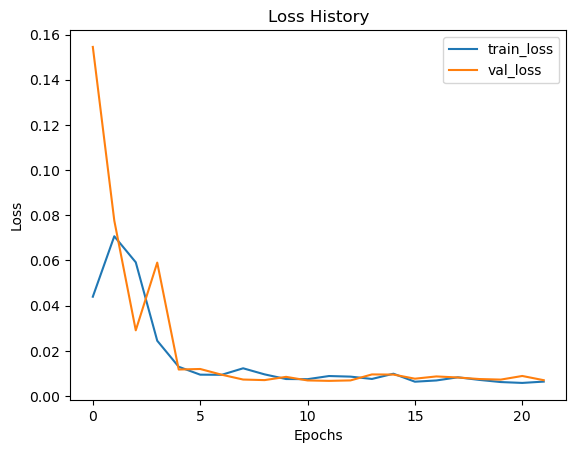

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

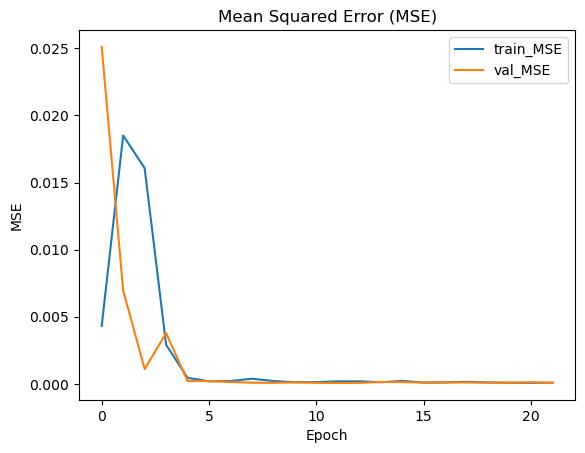

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

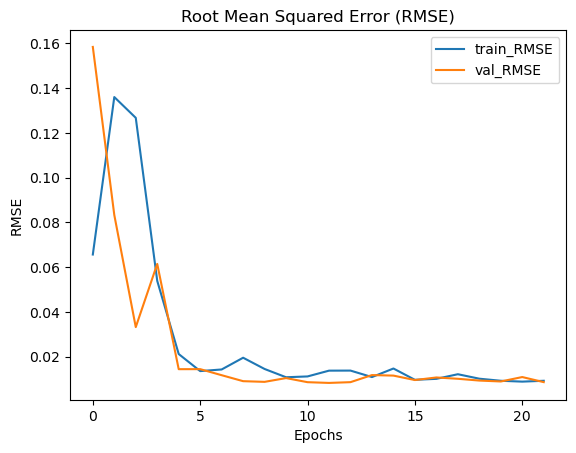

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

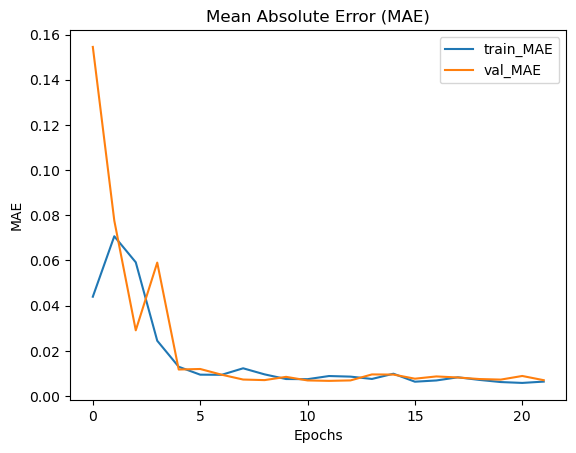

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

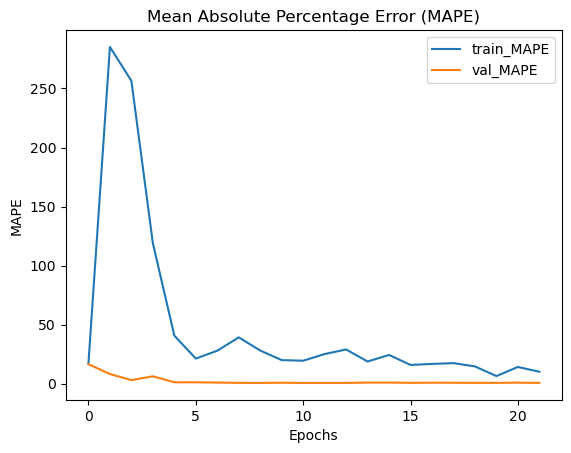

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:40:51.917090: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


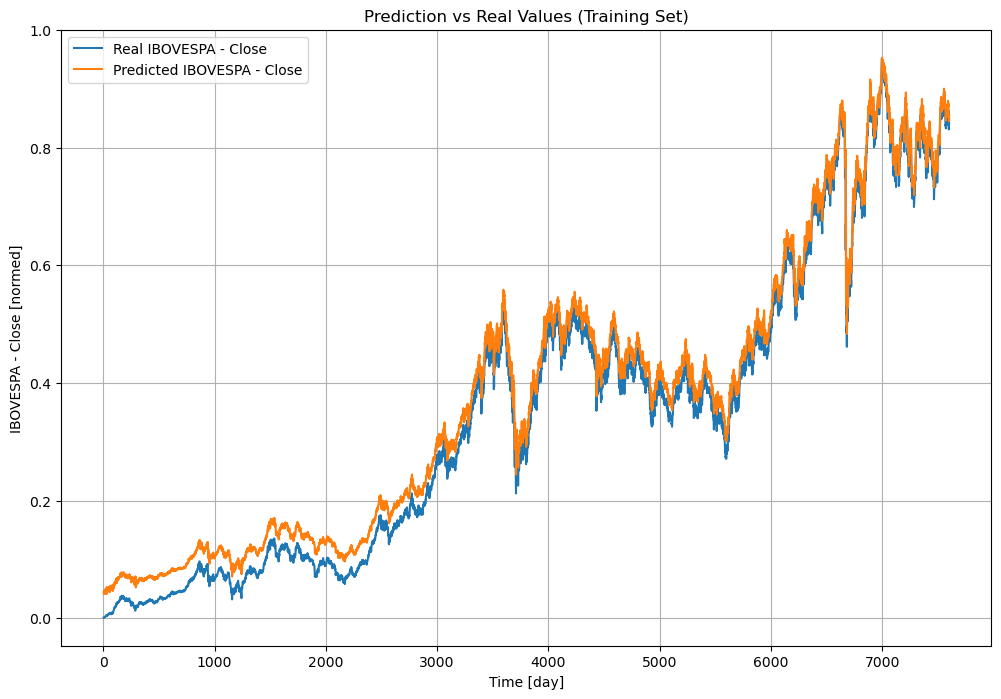

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


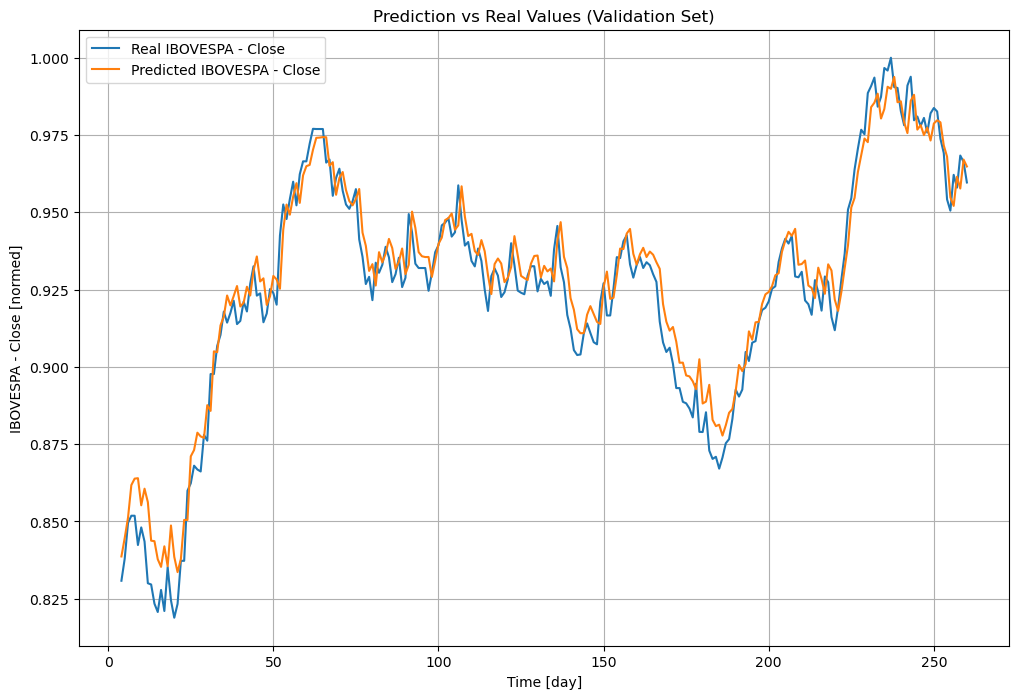

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


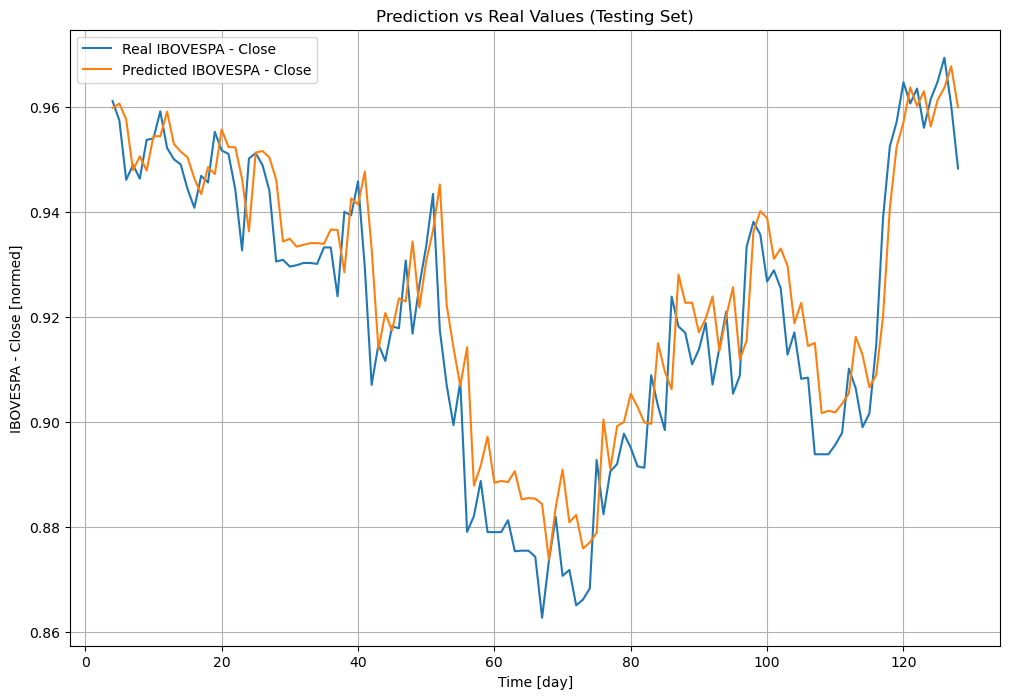

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

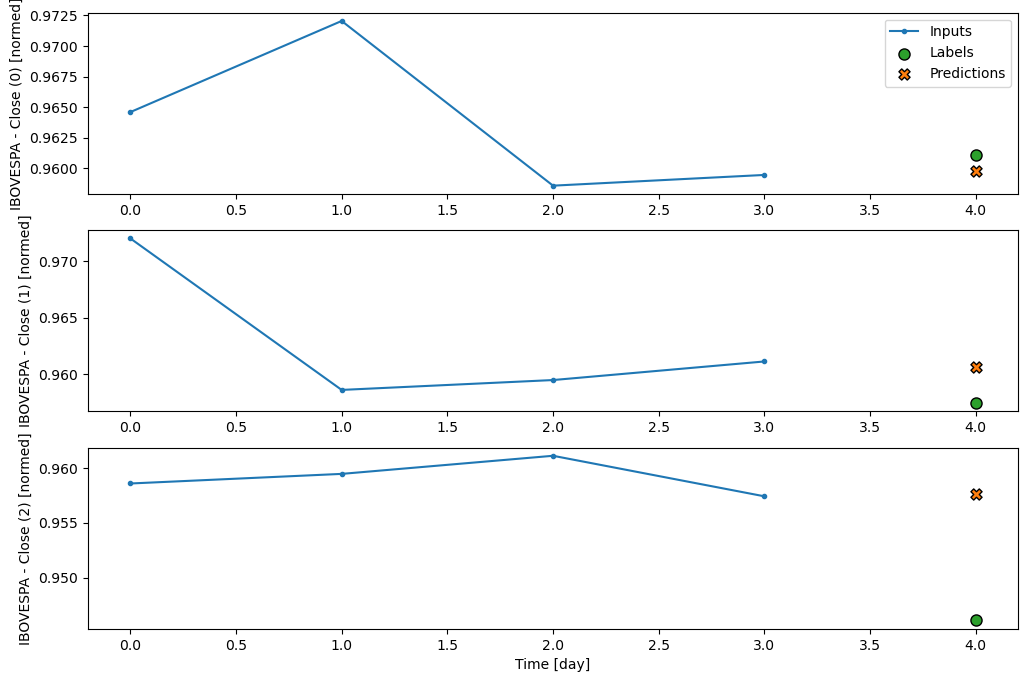

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:53s:763ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[[0.9598204 , 0.9598204 , 0.9598204 , ..., 0.9598204 ,
         0.9598204 , 0.9598204 ]],

       [[0.9606255 , 0.9606255 , 0.9606255 , ..., 0.9606255 ,
         0.9606255 , 0.9606255 ]],

       [[0.95758545, 0.95758545, 0.95758545, ..., 0.95758545,
         0.95758545, 0.95758545]],

       ...,

       [[0.96364367, 0.96364367, 0.96364367, ..., 0.96364367,
         0.96364367, 0.96364367]],

       [[0.9677346 , 0.9677346 , 0.9677346 , ..., 0.9677346 ,
         0.9677346 , 0.9677346 ]],

       [[0.9599333 , 0.9599333 , 0.9599333 , ..., 0.9599333 ,
         0.9599333 , 0.9599333 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')